In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go

In [12]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [13]:
deathstype = pd.read_csv('data/deathstype.csv',encoding="ISO-8859–1")
deathstype

,resolucion,genre,deaths,sharktype
0,no injury,f,0.0,whiteshark
1,bite,f,0.0,NaN
2,bite,m,0.0,NaN
3,bite,m,0.0,other
4,bite,m,0.0,tigershark
...,...,...,...,...
6290,death,m,1.0,NaN
6291,death,m,1.0,NaN
6292,death,m,1.0,NaN
6293,death,m,1.0,NaN


In [14]:
whity= pd.read_csv('data/whity.csv',encoding="ISO-8859–1")
whity

,resolucion,genre,deaths,sharktype
0,no injury,f,0.0,whiteshark
1,no injury,m,0.0,whiteshark
2,no injury,m,0.0,whiteshark
3,bite,m,0.0,whiteshark
4,bite,f,0.0,whiteshark
...,...,...,...,...
630,bite,m,0.0,whiteshark
631,NaN,m,NaN,whiteshark
632,bite,m,0.0,whiteshark
633,bite,f,0.0,whiteshark


In [15]:
def identificacion(x):
    x=str(x).lower()
    if "oth" in x:
        return np.nan
    elif x == "nan":
        return np.nan
    else:
        return x

In [27]:
deathstype["identificacion"]= deathstype.sharktype.apply(identificacion)
deathstype

,resolucion,genre,deaths,sharktype,identificacion
0,no injury,f,0.0,whiteshark,whiteshark
1,bite,f,0.0,NaN,NaN
2,bite,m,0.0,NaN,NaN
3,bite,m,0.0,other,NaN
4,bite,m,0.0,tigershark,tigershark
...,...,...,...,...,...
6290,death,m,1.0,NaN,NaN
6291,death,m,1.0,NaN,NaN
6292,death,m,1.0,NaN,NaN
6293,death,m,1.0,NaN,NaN


In [79]:
colors = {'no injury': "#F28E2B", 'bite': "#4E79A7", 'death': "#79706E"}
labels= deathstype.resolucion.unique()

In [113]:
labels = list(labels)

In [114]:
labels2 = [x for x in labels if str(x) != 'nan']

In [126]:
labels2

['no injury', 'bite', 'death']

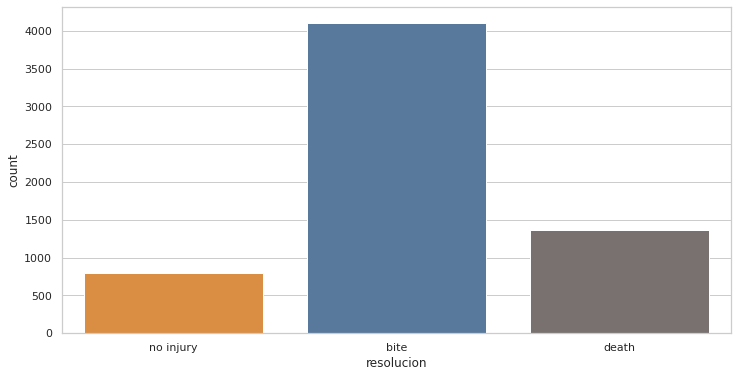

In [58]:
sns.countplot(x=deathstype.resolucion, palette=colors);
#en este gráfico podemos apreciar la resolucion de los encontronazos con tiburones en general.

In [135]:
deathstype.genre.value_counts()

m       5096
f        637
otro       4
Name: genre, dtype: int64

In [141]:
def otrofuera(x):
    x=str(x).lower()
    if "otr" in x:
        return np.nan
    elif x == "nan":
        return np.nan 
    else:
        return x

In [142]:
deathstype["sexo"]= deathstype.genre.apply(otrofuera)
deathstype

,resolucion,genre,deaths,sharktype,identificacion,sexo
0,no injury,f,0.0,whiteshark,whiteshark,f
1,bite,f,0.0,NaN,NaN,f
2,bite,m,0.0,NaN,NaN,m
3,bite,m,0.0,other,NaN,m
4,bite,m,0.0,tigershark,tigershark,m
...,...,...,...,...,...,...
6290,death,m,1.0,NaN,NaN,m
6291,death,m,1.0,NaN,NaN,m
6292,death,m,1.0,NaN,NaN,m
6293,death,m,1.0,NaN,NaN,m


In [116]:
[colors[key] for key in labels2]

['#F28E2B', '#4E79A7', '#79706E']

<AxesSubplot:ylabel='resolucion'>

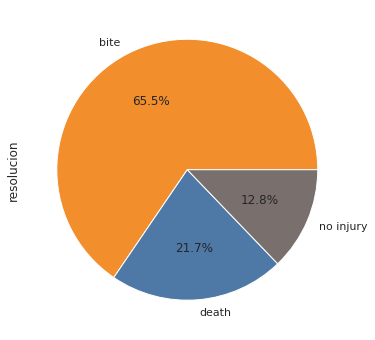

In [115]:
datos= deathstype["resolucion"].value_counts()

datos.plot.pie(autopct="%.1f%%", colors=[colors[key] for key in labels2])
#Probablididad de muerte si te enfrentas a un tiburón

<AxesSubplot:xlabel='resolucion', ylabel='count'>

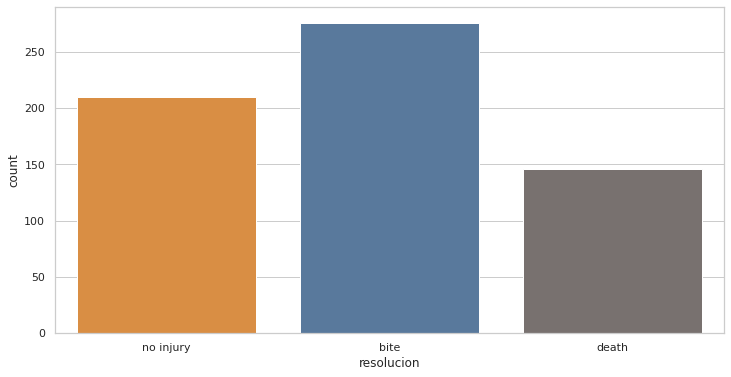

In [69]:
sns.countplot(x=whity.resolucion, palette=colors)
# aquí podmeos apreciar el mismo gráfico analizando solo los incidentes con los tiburones blancos.

In [118]:
labels3= list(whity.resolucion.unique())

In [125]:
labels3

['no injury', 'bite', 'death', nan]

In [123]:
labels4=[x for x in labels3 if str(x) != 'nan']

In [122]:
[colors[key] for key in labels4]

['#F28E2B', '#4E79A7', '#79706E']

In [127]:
labels4

['no injury', 'bite', 'death']

<AxesSubplot:ylabel='resolucion'>

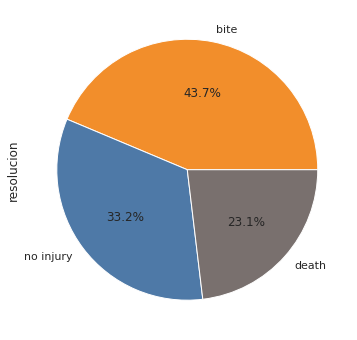

In [124]:
datos2= whity["resolucion"].value_counts()

datos2.plot.pie(autopct="%.1f%%", colors=[colors[key] for key in labels4])
#probabilidad de muerte si te enfrentas a un white shark

<AxesSubplot:xlabel='identificacion', ylabel='Count'>

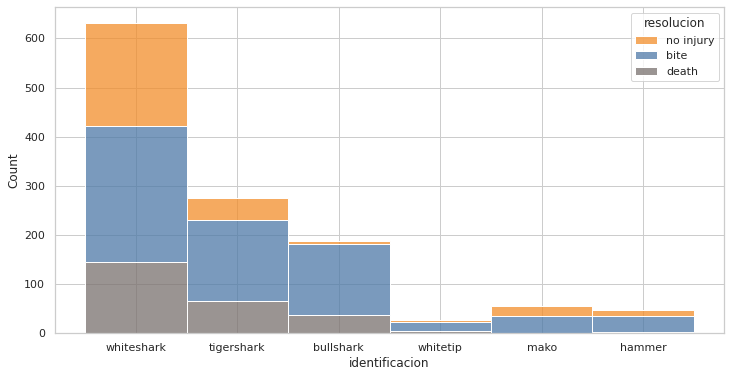

In [62]:

sns.histplot(data=deathstype, x="identificacion", hue="resolucion", multiple="stack", palette=colors)
#resolucion de los incidentes con los distintos tipos de tiburones

In [42]:
group = deathstype.groupby(["identificacion"])["resolucion"].value_counts().unstack()
group= group.rename(columns={'no injury': 'no_injury'})
group

resolucion,bite,death,no_injury
identificacion,,,
bullshark,143,38,6
hammer,34,2,12
mako,34,1,20
tigershark,165,65,45
whiteshark,276,146,210
whitetip,20,4,4


In [52]:
group.index.tolist()

['bullshark', 'hammer', 'mako', 'tigershark', 'whiteshark', 'whitetip']

In [151]:
animals= group.index.tolist() # ESTO ES UNA LISTA CON LOS NOMBRES 
fig = go.Figure(data=[
    go.Bar(name="no_injury", x=animals, y=group.no_injury, text= "No Injuries"),
    go.Bar(name="bite", x=animals, y=group.bite, text= "Biten"),
    go.Bar(name="death", x=animals, y=group.death, text= "FATALITY")
])
# CAMBIAR EL TIPO DE BARRAS
fig.update_layout(barmode="stack")
fig.show()
#resolucion de los incidentes con los distintos tipos de tiburones pero bien PRO